## Task-1
### Data Set- Titanic Data set
- replace null values in age column with ffill() method
- replace null values in cabin and embarked column with most occured values

In [1]:
import pandas as pd

In [2]:
titanic=pd.read_csv("https://raw.githubusercontent.com/nagamounika5/Datasets/master/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Program to replace null values in age column with ffill() method

In [8]:
titanic["Age"].ffill(inplace=True)

In [9]:
titanic["Age"].isnull().sum()

0

### Program to fill null values in cabin and embarked column with most repeated values

In [10]:
titanic["Cabin"].value_counts()

G6                 4
B96 B98            4
C23 C25 C27        4
C22 C26            3
F33                3
E101               3
D                  3
F2                 3
E33                2
C68                2
B5                 2
B58 B60            2
E24                2
C52                2
C78                2
D20                2
B57 B59 B63 B66    2
B22                2
F G73              2
C126               2
E67                2
B49                2
D35                2
B20                2
E8                 2
C124               2
B35                2
C125               2
D17                2
E25                2
                  ..
B39                1
F38                1
C148               1
C103               1
A16                1
C47                1
A24                1
C45                1
A6                 1
D47                1
B101               1
F G63              1
C49                1
E63                1
E34                1
B30                1
B86          

In [12]:
titanic["Cabin"].fillna("G6",inplace=True)

In [13]:
titanic["Cabin"].isnull().sum()

0

In [17]:
titanic["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
titanic["Embarked"].fillna("S",inplace=True)

In [19]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Task-2

-  display the plot of original data and robust scaler data of advertisement csv data

In [31]:
advertisement=pd.read_csv("https://raw.githubusercontent.com/nagamounika5/Datasets/master/Advertisement.csv")
advertisement.drop("Unnamed: 0",axis=1,inplace=True)
advertisement.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
advertisement.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [33]:
from sklearn.preprocessing import RobustScaler


In [34]:
re=RobustScaler()
re=pd.DataFrame(re.fit_transform(advertisement),columns=advertisement.columns)
re.head()

,TV,radio,newspaper,sales
0,0.556248,0.561205,1.343122,1.309609
1,-0.728626,0.617702,0.598145,-0.355872
2,-0.917619,0.866290,1.346213,-0.512456
3,0.012115,0.693032,1.012365,0.797153
4,0.214953,-0.455744,1.009274,0.000000


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

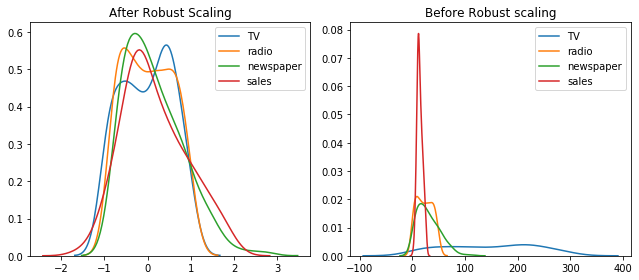

In [52]:
fig,(axes1,axes2)=plt.subplots(1,2,figsize=(9,4))

sns.kdeplot(re["TV"],ax=axes1)
sns.kdeplot(re["radio"],ax=axes1)
sns.kdeplot(re["newspaper"],ax=axes1)
sns.kdeplot(re["sales"],ax=axes1).set(title="After Robust Scaling")

sns.kdeplot(advertisement["TV"],ax=axes2).set(title="Before Robust scaling")
sns.kdeplot(advertisement["radio"],ax=axes2)
sns.kdeplot(advertisement["newspaper"],ax=axes2)
sns.kdeplot(advertisement["sales"],ax=axes2)

plt.tight_layout()